# Ride Sharing company's data analysis:
* More than half of the total fares are generated from Urban cities (62.7%) followed by Suburban cities (30.5%)
* 80.9% of the total drivers drive in Urban cities
* In Rural areas both total rides and number of drivers are much less however, the Average Fare is substantially higher than suburban and urban cities


In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_path = "data/city_data.csv"
ride_data_path = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_path)
ride_data = pd.read_csv(ride_data_path)

In [173]:
# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, how="left", on=["city","city"])

In [174]:
# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [175]:
# Set some parameters to apply to all plots. These can be overridden in each plot if desired
# Plot size to 14" x 7"
plt.rc('figure', figsize = (14,7))

# Font size to 14
plt.rc('font', size = 14)

# Set backgound color to white
plt.rc('axes', facecolor = 'white')

# Incorporate the other graph properties
plt.rc('axes.spines',right = True)
plt.rc('axes', grid = True)

## Bubble Plot of Ride Sharing Data

In [176]:
# Obtain the x,y and z coordinates for each of Urban cities data
urban_data = city_ride_data.loc[city_ride_data["type"]=="Urban"]
# X-Axis
urban_total_rides_per_city = urban_data.groupby("city")["ride_id"].count()
# Y- Axis
urban_avg_fare_per_city = urban_data.groupby("city")["fare"].mean()
# Area(third variable)
urban_total_drivers_per_city = urban_data.groupby("city")["driver_count"].sum()

In [177]:
# Obtain the x,y and z coordinates for each of Suburban cities data
suburban_data = city_ride_data.loc[city_ride_data["type"]=="Suburban"]
# X-Axis
suburban_total_rides_per_city = suburban_data.groupby("city")["ride_id"].count()
# Y- Axis
suburban_avg_fare_per_city = suburban_data.groupby("city")["fare"].mean()
# Area(third variable)
suburban_total_drivers_per_city = suburban_data.groupby("city")["driver_count"].sum()

In [178]:
# Obtain the x,y and z coordinates for each of rural cities data
rural_data = city_ride_data.loc[city_ride_data["type"]=="Rural"]
# X-Axis
rural_total_rides_per_city = rural_data.groupby("city")["ride_id"].count()
# Y- Axis
rural_avg_fare_per_city = rural_data.groupby("city")["fare"].mean()
# Area(third variable)
rural_total_drivers_per_city = rural_data.groupby("city")["driver_count"].sum()

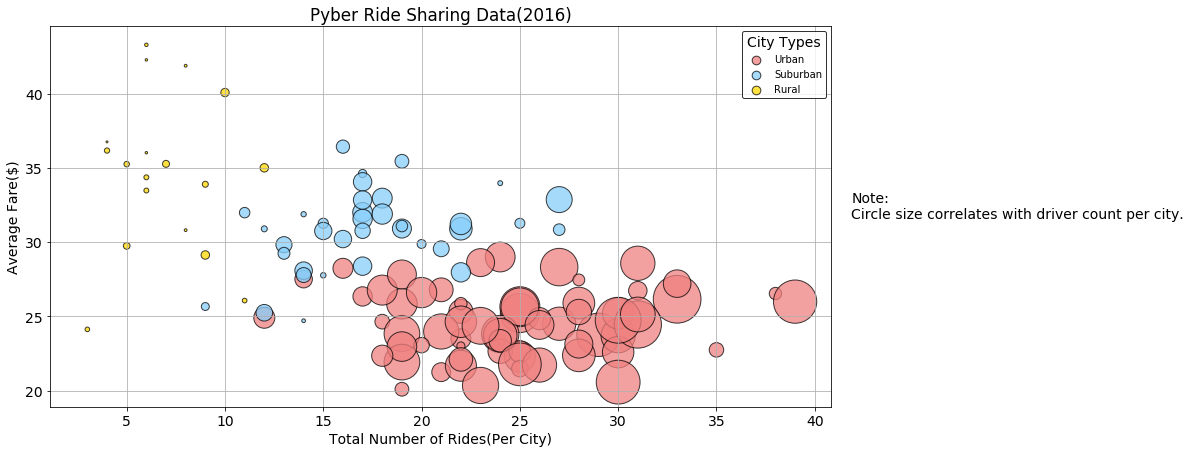

In [179]:
fig1 = plt.scatter(urban_total_rides_per_city,urban_avg_fare_per_city, \
            s = urban_total_drivers_per_city, c = "lightcoral", label = "Urban", \
                   edgecolor="black",linewidth=1,alpha=0.75)

fig2 = plt.scatter(suburban_total_rides_per_city, suburban_avg_fare_per_city, \
            s = suburban_total_drivers_per_city, c = "lightskyblue", label = "Suburban", \
                   edgecolor="black",linewidth=1,alpha=0.75)

fig3 = plt.scatter(rural_total_rides_per_city,rural_avg_fare_per_city,\
                   s=rural_total_drivers_per_city, c="gold", label = "Rural",\
                  edgecolor="black",linewidth=1,alpha=0.75)

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
# Create a legend
lgnd = plt.legend(loc="best", fontsize=10, edgecolor="black", title="City Types")
for handle in lgnd.legendHandles:
    handle.set_sizes([75.0])
plt.gcf().text(0.92, 0.5, "Note:\nCircle size correlates with driver count per city.", fontsize=14)

plt.savefig('Pyber_Ride_Sharing_2016.png')
plt.show()

## Total Fares by City Type

In [180]:
# Total fares by City Type
urban_total_fare = urban_data["fare"].sum()
suburban_total_fare = suburban_data["fare"].sum()
rural_total_fare = rural_data["fare"].sum()

In [181]:
city_types = ["Urban","Suburban","Rural"]
fares_by_city = [urban_total_fare,suburban_total_fare,rural_total_fare]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.1,0,0)

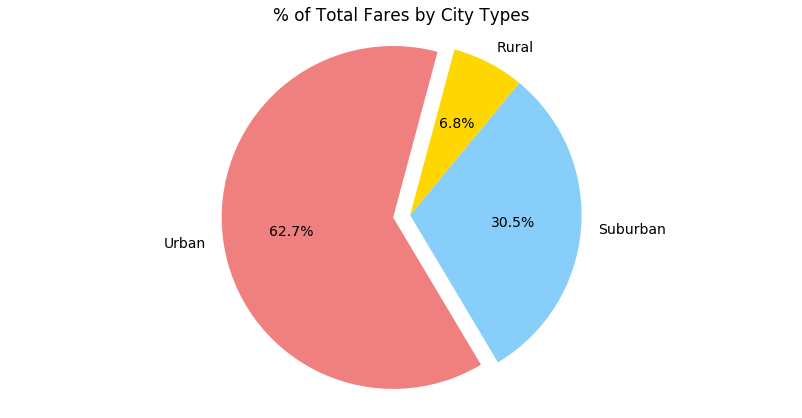

In [182]:
# Creating pie chart based on above data
plt.pie(fares_by_city, explode=explode, labels=city_types,colors=colors,autopct="%1.1f%%",shadow=False,startangle=75)
plt.title("% of Total Fares by City Types")
plt.axis("equal")
plt.savefig("fares_by_city_type.png")
plt.show()

## Total Rides by City Type

In [183]:
# Calculate Ride Percents
urban_total_rides = urban_data["ride_id"].count()
suburban_total_rides = suburban_data["ride_id"].count()
rural_total_rides = rural_data["ride_id"].count()

In [184]:
city_types = ["Urban","Suburban","Rural"]
rides_by_city = [urban_total_rides,suburban_total_rides,rural_total_rides]
colors = ["lightcoral","lightskyblue","gold"]
explode = [0.15,0,0]

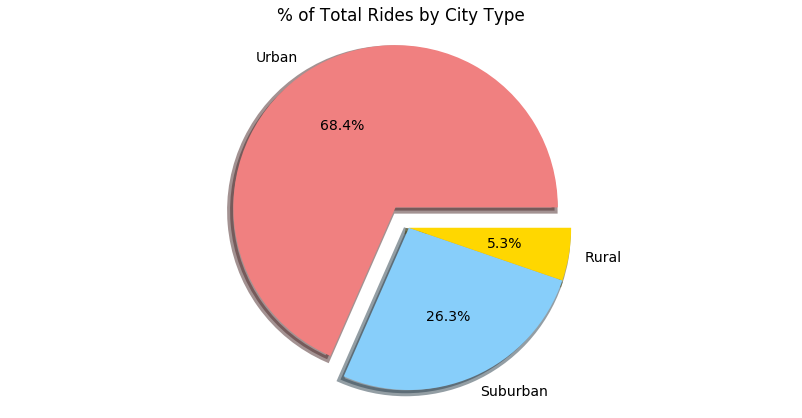

In [185]:
# Build Pie Chart
plt.pie(rides_by_city, labels=city_types, autopct="%1.1f%%", colors=colors, \
        shadow=True, wedgeprops = {'linewidth': 6}, explode=explode)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

plt.savefig("rides_by_city_type.png")
plt.show()

## Total Drivers by City Type

In [186]:
# Driver count is duplicated whenever city name is duplicated hence cleaning the data for getting the appropriate driver count
rural_data_unique = rural_data.drop_duplicates(subset = "city")
urban_data_unique = urban_data.drop_duplicates(subset = "city")
suburban_data_unique = suburban_data.drop_duplicates(subset = "city")

In [187]:
# Calculate Driver Percents
urban_total_drivers =  urban_data_unique["driver_count"].sum()
suburban_total_drivers = suburban_data_unique["driver_count"].sum()
rural_total_drivers = rural_data_unique["driver_count"].sum()

In [188]:
#print(urban_total_drivers)
#print(suburban_total_drivers)
#print(rural_total_drivers)

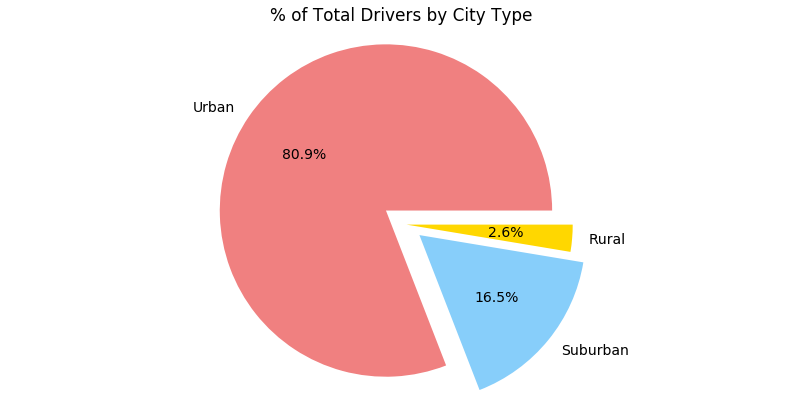

In [189]:
# Build Pie Charts
city_types = ["Urban","Suburban","Rural"]
drivers_by_city = [urban_total_drivers,suburban_total_drivers,rural_total_drivers]
colors = ["lightcoral","lightskyblue","gold"]
explode = [0.15,0.1,0]

plt.pie(drivers_by_city, labels=city_types,colors=colors,explode=explode,autopct="%1.1f%%", \
        shadow=False,wedgeprops = {'linewidth': 6})
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("total_drivers_by_city.png")
plt.show()